<a href="https://colab.research.google.com/github/theovrgl/IAE_METZ_2026_EMPIRICAL_FINANCE/blob/main/codefinalprojetR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impact boursier des annonces de M&A
## Ce projet étudie l’impact des annonces d’opérations de M&A sur la performance de l’action des entreprises acquéreuses : 

 ### Yannis Bresle - Théo Virgilio

### Les annonces de fusions-acquisitions créent-elles de la valeur pour les actionnaires des entreprises acquéreuses ?



In [38]:
!python -m pip install -U pip
!python -m pip install pandas numpy yfinance statsmodels
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm

## Création du dataset

In [62]:

data = [
    [1, "Microsoft Corp", "MSFT", "Activision Blizzard", "2022-01-18"],
    [2, "Broadcom Inc.", "AVGO", "VMware", "2022-05-26"],
    [3, "Exxon Mobil Corp", "XOM", "Pioneer Natural Resources", "2023-10-11"],
    [4, "Chevron Corp", "CVX", "Hess Corporation", "2023-10-23"],
    [5, "Anheuser-Busch InBev", "BUD", "SABMiller", "2015-09-15"],
    [6, "AT&T Inc.", "T", "Time Warner", "2016-10-22"],
    [7, "S&P Global Inc.", "SPGI", "IHS Markit", "2020-11-30"],
    [8, "United Technologies", "UTX", "Raytheon", "2019-06-09"],
    [9, "Dow Inc.", "DOW", "DuPont", "2015-12-11"],
    [10, "Exxon Corp", "XOM", "Mobil", "1998-12-01"],
    [11, "Citicorp", "C", "Travelers Group", "1998-04-06"],
    [12, "Glaxo Wellcome", "GSK", "SmithKline Beecham", "2000-01-17"],
    [13, "Pfizer Inc.", "PFE", "Warner-Lambert", "1999-11-04"],
    [14, "Verizon Communications", "VZ", "Vodafone (45% Verizon Wireless)", "2013-09-02"],
    [15, "Vodafone Group", "VOD", "Mannesmann", "1999-11-14"],
    [16, "Royal Dutch Shell", "SHEL", "BG Group", "2015-04-08"],
    [17, "Comcast Corp", "CMCSA", "Sky plc", "2018-04-25"],
    [18, "The Walt Disney Company", "DIS", "21st Century Fox (assets)", "2017-12-14"],
    [19, "Oracle Corp", "ORCL", "Cerner", "2021-12-20"],
    [20, "Salesforce Inc.", "CRM", "Slack Technologies", "2020-12-01"],
    [21, "NVIDIA Corp*", "NVDA", "Arm Holdings", "2020-09-13"],
    [22, "Dell Technologies", "DELL", "EMC Corp", "2015-10-12"],
    [23, "CVS Health Corp", "CVS", "Aetna", "2017-12-03"],
    [24, "Analog Devices", "ADI", "Maxim Integrated", "2020-07-13"],
    [25, "Toronto-Dominion Bank*", "TD", "First Horizon", "2022-02-28"],
    [26, "EQT Corp", "EQT", "Equitrans Midstream", "2024-03-11"],
    [27, "Alcoa Corp", "AA", "Alumina Limited", "2024-02-26"],
    [28, "AstraZeneca", "AZN", "Amolyt Pharma", "2024-06-24"],
]

df = pd.DataFrame(data, columns=["ID", "Acquéreur", "Ticker", "Cible", "Date d’annonce"])
df["Date d’annonce"] = pd.to_datetime(df["Date d’annonce"])



In [63]:
import pandas as pd

new_data = [
    [101, "Amazon", "AMZN", "Whole Foods Market", "2017-06-16"],
    [102, "Apple", "AAPL", "Beats Electronics", "2014-05-28"],
    [103, "Meta Platforms", "META", "WhatsApp", "2014-02-19"],
    [104, "Microsoft", "MSFT", "LinkedIn", "2016-06-13"],
    [105, "Pfizer", "PFE", "Allergan", "2015-11-23"],
    [106, "Danone", "BN.PA", "WhiteWave", "2016-07-07"],
    [107, "Dassault Systemes", "DSY.PA", "Medidata", "2019-06-03"],
    [108, "Publicis", "PUB.PA", "Sapient", "2014-11-03"],
    [109, "Safran", "SAF.PA", "Zodiac Aerospace", "2017-01-19"],
    [110, "Nokia", "NOK", "Alcatel-Lucent", "2015-04-15"],
    [111, "Takeda", "TAK", "Shire", "2018-05-08"],
    [112, "Shell", "SHEL", "BG Group", "2015-04-08"],
    [113, "Alphabet", "GOOGL", "Fitbit", "2019-11-01"],
    [114, "Samsung Electronics", "SSNLF", "Harman", "2016-11-14"],
]

df_new = pd.DataFrame(
    new_data,
    columns=["ID", "Acquéreur", "Ticker", "Cible", "Date d’annonce"]
)

df_new["Date d’annonce"] = pd.to_datetime(df_new["Date d’annonce"])

df_new

,ID,Acquéreur,Ticker,Cible,Date d’annonce
0,101,Amazon,AMZN,Whole Foods Market,2017-06-16
1,102,Apple,AAPL,Beats Electronics,2014-05-28
2,103,Meta Platforms,META,WhatsApp,2014-02-19
3,104,Microsoft,MSFT,LinkedIn,2016-06-13
4,105,Pfizer,PFE,Allergan,2015-11-23
5,106,Danone,BN.PA,WhiteWave,2016-07-07
6,107,Dassault Systemes,DSY.PA,Medidata,2019-06-03
7,108,Publicis,PUB.PA,Sapient,2014-11-03
8,109,Safran,SAF.PA,Zodiac Aerospace,2017-01-19
9,110,Nokia,NOK,Alcatel-Lucent,2015-04-15


In [64]:
df = pd.concat([df, df_new], ignore_index=True)
df = df.drop_duplicates(subset=["Ticker", "Date d’annonce"])

In [65]:
# Fusion des deux bases
df_global = pd.concat([df, df_new], ignore_index=True)

# Sécurité : suppression des doublons éventuels
df_global = df_global.drop_duplicates(
    subset=["Ticker", "Date d’annonce"]
)

# Tri par date
df_global = df_global.sort_values("Date d’annonce").reset_index(drop=True)

In [66]:
import pandas as pd

new_deals_2 = [
    [201, "Facebook (Meta)", "META", "Instagram", "2012-04-09"],
    [202, "Google (Alphabet)", "GOOGL", "Motorola Mobility", "2011-08-15"],
    [203, "Amazon", "AMZN", "MGM Holdings", "2021-05-26"],
    [204, "Microsoft", "MSFT", "GitHub", "2018-06-04"],
    [205, "Salesforce", "CRM", "Tableau Software", "2019-06-10"],
    [206, "Disney", "DIS", "Pixar Animation Studios", "2006-01-24"],
    [207, "Oracle", "ORCL", "PeopleSoft", "2003-06-06"],
    [208, "IBM", "IBM", "Red Hat", "2018-10-28"],
    [209, "Bayer", "BAYN.DE", "Monsanto", "2016-09-14"],
    [210, "JPMorgan Chase", "JPM", "Bear Stearns", "2008-03-16"],
    [211, "AT&T", "T", "DirecTV", "2014-05-18"],
    [212, "Facebook (Meta)", "META", "Oculus VR", "2014-03-25"],
]

df_new_2 = pd.DataFrame(
    new_deals_2,
    columns=["ID", "Acquéreur", "Ticker", "Cible", "Date d’annonce"]
)

df_new_2["Date d’annonce"] = pd.to_datetime(df_new_2["Date d’annonce"]).dt.date

In [67]:
df_global = pd.concat([df_global, df_new_2], ignore_index=True)

# Uniformiser le type de date (tout en datetime pandas)
df_global["Date d’annonce"] = pd.to_datetime(df_global["Date d’annonce"])

# Doublons + tri
df_global = df_global.drop_duplicates(subset=["Ticker", "Date d’annonce"])
df_global = df_global.sort_values("Date d’annonce").reset_index(drop=True)

In [68]:
df_global["Date_affichage"] = df_global["Date d’annonce"].dt.strftime("%Y-%m-%d")
df_global[["ID","Acquéreur","Ticker","Cible","Date_affichage"]]

,ID,Acquéreur,Ticker,Cible,Date_affichage
0,11,Citicorp,C,Travelers Group,1998-04-06
1,10,Exxon Corp,XOM,Mobil,1998-12-01
2,13,Pfizer Inc.,PFE,Warner-Lambert,1999-11-04
3,15,Vodafone Group,VOD,Mannesmann,1999-11-14
4,12,Glaxo Wellcome,GSK,SmithKline Beecham,2000-01-17
5,207,Oracle,ORCL,PeopleSoft,2003-06-06
6,206,Disney,DIS,Pixar Animation Studios,2006-01-24
7,210,JPMorgan Chase,JPM,Bear Stearns,2008-03-16
8,202,Google (Alphabet),GOOGL,Motorola Mobility,2011-08-15
9,201,Facebook (Meta),META,Instagram,2012-04-09


In [69]:
df_export = df_global.copy()
df_export["Date d’annonce"] = df_export["Date d’annonce"].dt.strftime("%Y-%m-%d")

df_export.to_csv("base_MA_complete-2.csv", index=False)

In [70]:
print("Nombre total de deals :", len(df_global))

Nombre total de deals : 53


## Calcul des rendements de marché (S&P500)

In [71]:
!pip install yfinance

import yfinance as yf
import numpy as np

spx_prices = yf.download(
    "^GSPC", start="1995-01-01", progress=False, auto_adjust=True
)["Close"].squeeze()

market = np.log(spx_prices / spx_prices.shift(1)).dropna()
market.name = "Rm"

## Fonction envent study

In [72]:
def event_study(
    ticker: str,
    event_date,
    market_returns: pd.Series,
    est_window=(-250, -30),
    event_window=(-5, 5),
    min_est_obs=120,
    lookback_days=900,
    post_days=60
):


    event_date = pd.to_datetime(event_date)

    # Download stock adjusted prices
    prices = yf.download(
        ticker,
        start=event_date - pd.Timedelta(days=lookback_days),
        end=event_date + pd.Timedelta(days=post_days),
        progress=False,
        auto_adjust=True
    )["Close"].squeeze()

    if prices is None or len(prices) == 0:
        return np.nan

    ri = np.log(prices / prices.shift(1)).dropna()
    ri.name = "Ri"

    rm = market_returns.squeeze().dropna()
    rm.name = "Rm"

    df_ret = pd.concat([ri, rm], axis=1).dropna()
    if df_ret.empty:
        return np.nan

    # Align event date to a trading day:
    # use the previous trading day if event_date not in index
    if event_date not in df_ret.index:
        pos = df_ret.index.searchsorted(event_date) - 1
        if pos < 0:
            return np.nan
        event_idx = df_ret.index[pos]
    else:
        event_idx = event_date

    i0 = df_ret.index.get_loc(event_idx)

    # Convert windows (relative) to index slices
    est_start = i0 + est_window[0]
    est_end   = i0 + est_window[1]
    evt_start = i0 + event_window[0]
    evt_end   = i0 + event_window[1]

    # Boundary checks
    if est_start < 0 or evt_start < 0 or evt_end >= len(df_ret):
        return np.nan

    est = df_ret.iloc[est_start:est_end + 1]
    evt = df_ret.iloc[evt_start:evt_end + 1]

    if len(est) < min_est_obs or evt.empty:
        return np.nan

    # Market model estimation
    X = sm.add_constant(est["Rm"])
    model = sm.OLS(est["Ri"], X).fit()

    # Abnormal returns & CAR
    evt = evt.copy()
    evt["R_hat"] = model.predict(sm.add_constant(evt["Rm"]))
    evt["AR"] = evt["Ri"] - evt["R_hat"]

    return float(evt["AR"].sum())

Event Study :

Cette fonction intègre une méthodologie d’event study afin de mesurer
l’impact d’une annonce de fusion-acquisition sur le rendement d’une entreprise.

Le principe consiste à comparer le rendement observé du titre autour de la date
d’annonce à un rendement “normal” estimé via un modèle de marché
(Ri,t = αi + βi Rm,t) sur une fenêtre d’estimation antérieure à l’événement.

La différence entre le rendement observé et rendement attendu correspond
au rendement anormal (AR). Ces AR sont ensuite utilisés pour calculer
le CAR sur la fenêtre événementielle (-5,+5).

## Calcul des CARs pour chaque deal

In [73]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df_global["Date d’annonce"] = pd.to_datetime(df_global["Date d’annonce"])

df_global["CAR_[-5,+5]"] = [
    event_study(row["Ticker"], row["Date d’annonce"], market)
    for _, row in df_global.iterrows()
]

print(
    df_global[["Ticker", "Date d’annonce", "CAR_[-5,+5]"]]
    .sort_values("CAR_[-5,+5]")
)

/tmp/ipykernel_21972/3296806960.py:33: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()
/tmp/ipykernel_21972/3296806960.py:33: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()
/tmp/ipykernel_21972/3296806960.py:33: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to sile

     Ticker Date d’annonce  CAR_[-5,+5]
42      CRM     2020-12-01    -0.183732
26    SSNLF     2016-11-14    -0.179543
44     ORCL     2021-12-20    -0.168596
2       PFE     1999-11-04    -0.156447
12     META     2014-03-25    -0.147988
40     NVDA     2020-09-13    -0.101035
51      EQT     2024-03-11    -0.100869
34      IBM     2018-10-28    -0.099715
37      CRM     2019-06-10    -0.099354
3       VOD     1999-11-14    -0.098614
47     AVGO     2022-05-26    -0.084486
49      CVX     2023-10-23    -0.084002
25        T     2016-10-22    -0.083871
39      ADI     2020-07-13    -0.081417
46       TD     2022-02-28    -0.079604
8     GOOGL     2011-08-15    -0.075664
27   SAF.PA     2017-01-19    -0.049301
41     SPGI     2020-11-30    -0.047582
4       GSK     2000-01-17    -0.041398
48      XOM     2023-10-11    -0.038486
13        T     2014-05-18    -0.035488
5      ORCL     2003-06-06    -0.034691
10       VZ     2013-09-02    -0.033245
20      PFE     2015-11-23    -0.032468


/tmp/ipykernel_21972/3296806960.py:33: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()
/tmp/ipykernel_21972/3296806960.py:33: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()


Les rendements anormaux (AR) sont calculés pour chaque opération
sur la fenêtre événementielle (-5,+5). Ils sont ensuite regroupés
afin de calculer l’Average Abnormal Return (AAR) pour chaque jour
relatif à l’annonce.

La somme cumulée des AAR permet d’obtenir la CAAR, qui mesure
l’impact moyen des annonces sur l’ensemble de l’échantillon.

In [74]:
failed = df_global[df_global["CAR_[-5,+5]"].isna()][["Ticker", "Date d’annonce", "Acquéreur", "Cible"]]
ok = df_global[df_global["CAR_[-5,+5]"].notna()].copy()

print("Exploitables:", len(ok), "/", len(df_global))
print("\nNon exploitables (Yahoo):")
print(failed)

Exploitables: 49 / 53

Non exploitables (Yahoo):
   Ticker Date d’annonce            Acquéreur      Cible
9    META     2012-04-09      Facebook (Meta)  Instagram
19   DELL     2015-10-12    Dell Technologies   EMC Corp
21    DOW     2015-12-11             Dow Inc.     DuPont
36    UTX     2019-06-09  United Technologies   Raytheon


## Test statistique

In [75]:
from scipy import stats
import numpy as np

car = df_global["CAR_[-5,+5]"].dropna()
N = len(car)

print("N exploitables =", N)

N exploitables = 49


In [76]:
mean_car = car.mean()
median_car = car.median()
std_car = car.std(ddof=1)
neg_ratio = (car < 0).mean()

print("\n=== Statistiques descriptives ===")
print("CAR moyen      :", mean_car)
print("CAR médian     :", median_car)
print("Ecart-type     :", std_car)
print("% CAR négatifs :", neg_ratio)


=== Statistiques descriptives ===
CAR moyen      : -0.03729719768265559
CAR médian     : -0.03082528831895361
Ecart-type     : 0.06852656276965247
% CAR négatifs : 0.7346938775510204


In [77]:
t_stat, p_t = stats.ttest_1samp(car, 0.0, alternative="two-sided")

print("\n=== Test t ===")
print("t-stat =", t_stat)
print("p-value =", p_t)


=== Test t ===
t-stat = -3.809915063975902
p-value = 0.00039542116598144654


Un t test est réalisé afin de déterminer si le
Cumulative Abnormal Return (CAR) moyen de l’échantillon est
statistiquement différent de zéro.

L’hypothèse nulle (H0) suppose que le CAR moyen est égal à zéro,
ce qui correspond à une absence d’effet moyen des annonces de
fusions-acquisitions sur les actionnaires des entreprises acquéreuses.

La p-value faible indique que le CAR observé est peu compatible
avec l’hypothèse d’absence d’effet et peut donc être considéré
comme statistiquement significatif.

In [78]:
car_nz = car[car != 0]

w_stat, p_w = stats.wilcoxon(car_nz, alternative="two-sided")

print("\n=== Test de Wilcoxon ===")
print("W-stat =", w_stat)
print("p-value =", p_w)


=== Test de Wilcoxon ===
W-stat = 256.0
p-value = 0.00025044313724009726


In [79]:
k = int((car < 0).sum())

p_sign = stats.binomtest(
    k, N, 0.5, alternative="greater"
).pvalue

print("\n=== Test de signe ===")
print("Nombre de CAR négatifs =", k)
print("p-value =", p_sign)


=== Test de signe ===
Nombre de CAR négatifs = 36
p-value = 0.0007013442518477575


## Traçage de graphiques pour illustration

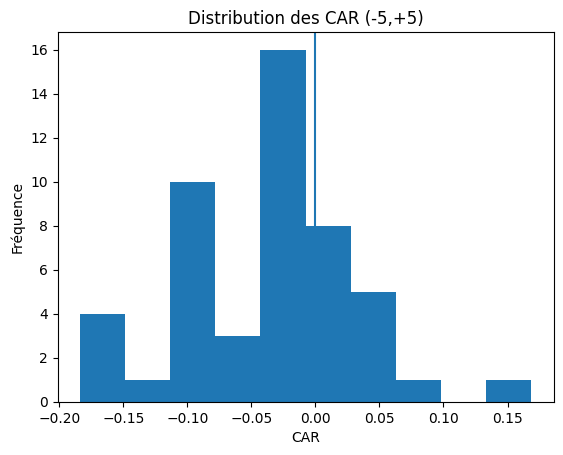

In [81]:
!pip install matplotlib
import matplotlib.pyplot as plt

car = df_global["CAR_[-5,+5]"].dropna()

plt.figure()
plt.hist(car, bins=10)
plt.axvline(0)
plt.title("Distribution des CAR (-5,+5)")
plt.xlabel("CAR")
plt.ylabel("Fréquence")
plt.show()

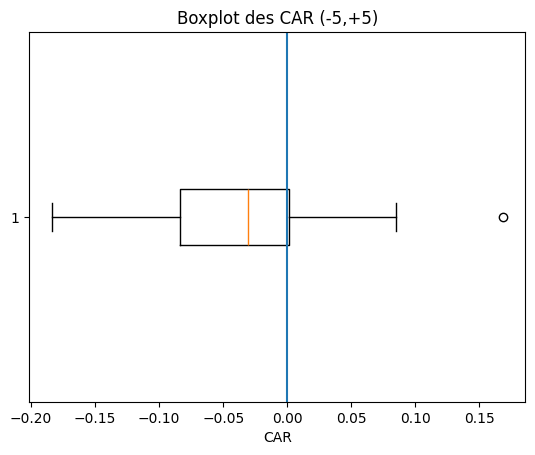

In [82]:
plt.figure()
plt.boxplot(car, vert=False)
plt.axvline(0)
plt.title("Boxplot des CAR (-5,+5)")
plt.xlabel("CAR")

#AUVEGARDE DE L'IMAGE
plt.savefig(
    "boxplot_CAR_-5_+5.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

In [83]:
def event_study_AR(
    ticker, event_date, market_returns,
    est_window=(-250,-30), event_window=(-5,5),
    lookback_days=900, post_days=60
):
    event_date = pd.to_datetime(event_date)

    prices = yf.download(
        ticker,
        start=event_date - pd.Timedelta(days=lookback_days),
        end=event_date + pd.Timedelta(days=post_days),
        progress=False,
        auto_adjust=True
    )["Close"].squeeze()

    if prices is None or len(prices)==0:
        return None

    ri = np.log(prices/prices.shift(1)).dropna().rename("Ri")
    rm = market_returns.dropna().rename("Rm")

    df_ret = pd.concat([ri, rm], axis=1).dropna()
    if df_ret.empty:
        return None

    pos = df_ret.index.searchsorted(event_date) - 1
    if pos < 0:
        return None
    i0 = pos

    est = df_ret.iloc[i0+est_window[0]:i0+est_window[1]+1]
    evt = df_ret.iloc[i0+event_window[0]:i0+event_window[1]+1]

    if len(est) < 120 or evt.empty:
        return None

    X = sm.add_constant(est["Rm"])
    model = sm.OLS(est["Ri"], X).fit()

    evt = evt.copy()
    evt["AR"] = evt["Ri"] - model.predict(sm.add_constant(evt["Rm"]))
    evt["t"] = range(event_window[0], event_window[1]+1)

    return evt[["t","AR"]]

In [84]:
ar_list = []

df_global["Date d’annonce"] = pd.to_datetime(df_global["Date d’annonce"])

for _, row in df_global.iterrows():
    res = event_study_AR(row["Ticker"], row["Date d’annonce"], market)
    if res is not None:
        ar_list.append(res)

ar_df = pd.concat(ar_list, ignore_index=True)
aar = ar_df.groupby("t")["AR"].mean()
caar = aar.cumsum()

/tmp/ipykernel_21972/3190139855.py:22: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()
/tmp/ipykernel_21972/3190139855.py:22: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()
/tmp/ipykernel_21972/3190139855.py:22: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to sile

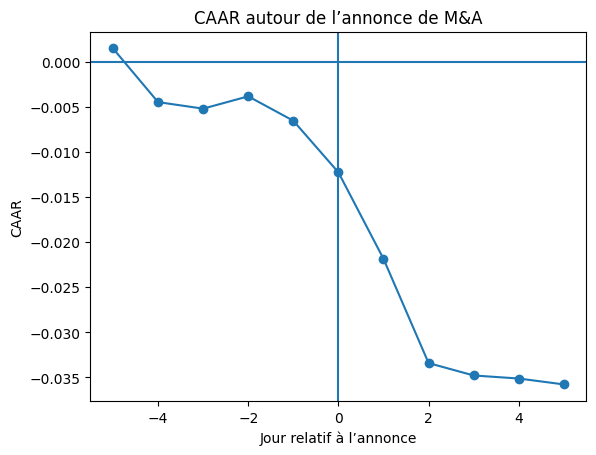

In [85]:
plt.figure()
plt.plot(caar.index, caar.values, marker='o')
plt.axhline(0)
plt.axvline(0)
plt.title("CAAR autour de l’annonce de M&A")
plt.xlabel("Jour relatif à l’annonce")
plt.ylabel("CAAR")

#SAUVEGARDE DE L'IMAGE
plt.savefig(
    "CAAR_autour_annonce_MA.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

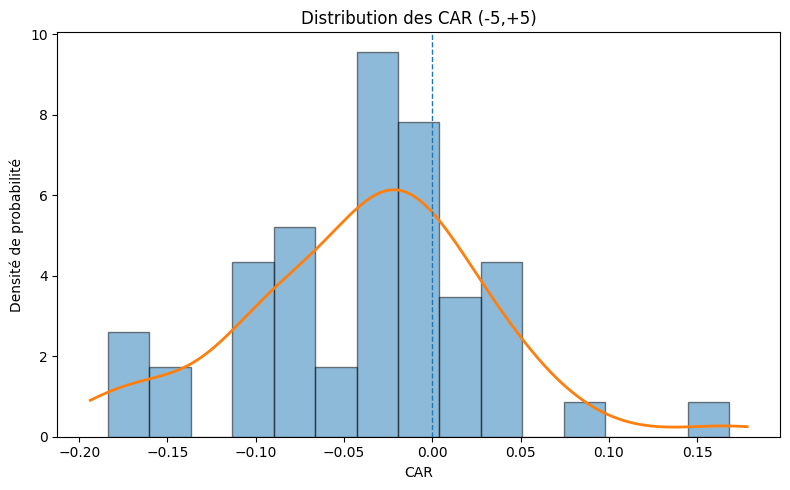

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# CAR
car = df_global["CAR_[-5,+5]"].dropna()

# Grille pour la densité
x_grid = np.linspace(car.min() - 0.01, car.max() + 0.01, 500)

# KDE
kde = gaussian_kde(car)
density = kde(x_grid)

plt.figure(figsize=(8, 5))

# Histogramme normalisé
plt.hist(
    car,
    bins=15,
    density=True,
    alpha=0.5,
    edgecolor='black'
)

# Densité lissée
plt.plot(x_grid, density, linewidth=2)

# Ligne verticale à 0
plt.axvline(0, linestyle='--', linewidth=1)

plt.title("Distribution des CAR (-5,+5)")
plt.xlabel("CAR")
plt.ylabel("Densité de probabilité")
plt.tight_layout()

# SAUVEGARDE DE L'IMAGE
plt.savefig(
    "distribution_CAR_-5_+5_densite.png",
    dpi=300,          # qualité impression
    bbox_inches="tight"
)

plt.show()

## Illustration de la méthode :

Afin de rendre la démarche plus pédagogique, nous avons décidé d'appliquer l'analyse à une opération spécifique (acquisition de Slack par
Salesforce).

Ce cas permet de visualiser  la construction des
rendements anormaux (AR) et du CAR sur la fenêtre événementielle,
avant d’étendre la méthodologie à l’ensemble de l’échantillon.

In [87]:
import pandas as pd

df_global["Date d’annonce"] = pd.to_datetime(df_global["Date d’annonce"])

# filtre robuste : acquéreur contient Salesforce et cible contient Slack
mask = (
    df_global["Acquéreur"].astype(str).str.contains("Salesforce", case=False, na=False)
    & df_global["Cible"].astype(str).str.contains("Slack", case=False, na=False)
)

row = df_global.loc[mask].iloc[0]
row[["Acquéreur", "Ticker", "Cible", "Date d’annonce", "CAR_[-5,+5]"]]

Acquéreur             Salesforce Inc.
Ticker                            CRM
Cible              Slack Technologies
Date d’annonce    2020-12-01 00:00:00
CAR_[-5,+5]                 -0.183732
Name: 42, dtype: object

In [88]:
import numpy as np
import yfinance as yf
import statsmodels.api as sm

def event_study_case_one_deal(
    ticker: str,
    event_date,
    market_returns: pd.Series,
    est_window=(-250, -30),
    event_window=(-5, 5),
    min_est_obs=120,
    lookback_days=900,
    post_days=60
):
    event_date = pd.to_datetime(event_date)

    # Prices (adjusted)
    prices = yf.download(
        ticker,
        start=event_date - pd.Timedelta(days=lookback_days),
        end=event_date + pd.Timedelta(days=post_days),
        progress=False,
        auto_adjust=True
    )["Close"].squeeze()

    if prices is None or len(prices) == 0:
        return None

    ri = np.log(prices / prices.shift(1)).dropna()
    ri.name = "Ri"

    rm = market_returns.squeeze().dropna()
    rm.name = "Rm"

    df_ret = pd.concat([ri, rm], axis=1).dropna()
    if df_ret.empty:
        return None

    # Align event date to a trading day (previous trading day if needed)
    if event_date not in df_ret.index:
        pos = df_ret.index.searchsorted(event_date) - 1
        if pos < 0:
            return None
        event_idx = df_ret.index[pos]
    else:
        event_idx = event_date

    i0 = df_ret.index.get_loc(event_idx)

    est_start = i0 + est_window[0]
    est_end   = i0 + est_window[1]
    evt_start = i0 + event_window[0]
    evt_end   = i0 + event_window[1]

    if est_start < 0 or evt_start < 0 or evt_end >= len(df_ret):
        return None

    est = df_ret.iloc[est_start:est_end + 1]
    evt = df_ret.iloc[evt_start:evt_end + 1]

    if len(est) < min_est_obs or evt.empty:
        return None

    # Market model
    X = sm.add_constant(est["Rm"])
    model = sm.OLS(est["Ri"], X).fit()

    evt = evt.copy()
    evt["R_hat"] = model.predict(sm.add_constant(evt["Rm"]))
    evt["AR"] = evt["Ri"] - evt["R_hat"]

    # Relative day index for event window
    evt["t"] = np.arange(event_window[0], event_window[1] + 1)
    evt = evt.set_index("t")

    car = float(evt["AR"].sum())

    return {
        "event_date": event_date,
        "event_idx": event_idx,
        "alpha": float(model.params["const"]),
        "beta": float(model.params["Rm"]),
        "car": car,
        "evt_df": evt,      # index t, columns: Ri, Rm, R_hat, AR
        "df_ret": df_ret,   # full aligned returns by date
        "model": model
    }

In [89]:
case = event_study_case_one_deal(
    ticker=row["Ticker"],
    event_date=row["Date d’annonce"],
    market_returns=market
)

case["alpha"], case["beta"], case["car"]

/tmp/ipykernel_21972/3354595735.py:35: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()


(0.0015765687077564222, 1.053553616135436, -0.18373207457425922)

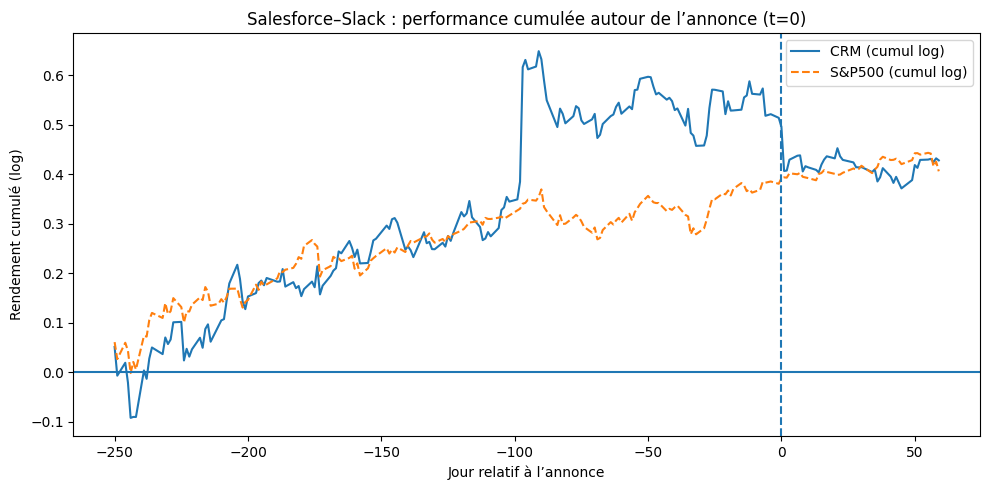

In [90]:
import matplotlib.pyplot as plt

df_ret = case["df_ret"].copy()
event_idx = case["event_idx"]

# Jours relatifs sur toute la période dispo
df_ret["t"] = (df_ret.index.normalize() - event_idx.normalize()).days
df_ret = df_ret.set_index("t").sort_index()

# Fenêtre large pour le storytelling (modifiable)
win_start, win_end = -250, 60
df_win = df_ret.loc[win_start:win_end].copy()

df_win["Cum_Ri"] = df_win["Ri"].cumsum()
df_win["Cum_Rm"] = df_win["Rm"].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(df_win.index, df_win["Cum_Ri"].values, label=f"{row['Ticker']} (cumul log)")
plt.plot(df_win.index, df_win["Cum_Rm"].values, linestyle="--", label="S&P500 (cumul log)")
plt.axvline(0, linestyle="--")
plt.axhline(0)
plt.title(f"Salesforce–Slack : performance cumulée autour de l’annonce (t=0)")
plt.xlabel("Jour relatif à l’annonce")
plt.ylabel("Rendement cumulé (log)")
plt.legend()
plt.tight_layout()
plt.savefig("case_salesforce_slack_performance_cumulee.png", dpi=300, bbox_inches="tight")
plt.show()

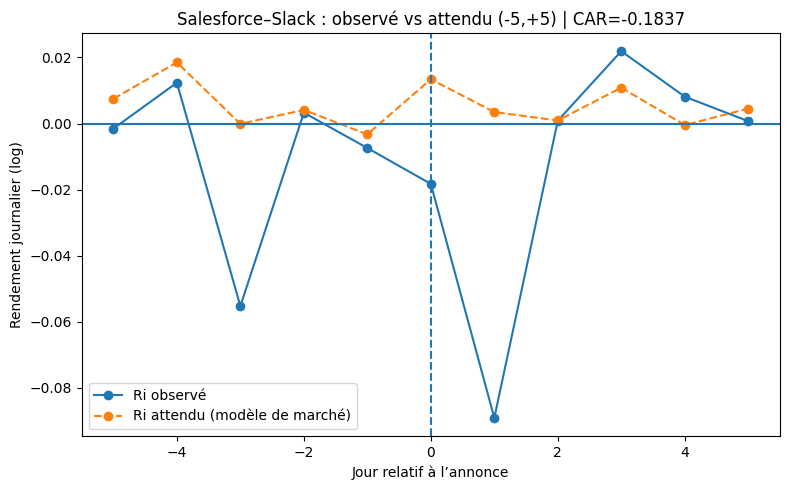

In [91]:
evt = case["evt_df"]

plt.figure(figsize=(8, 5))
plt.plot(evt.index, evt["Ri"].values, marker="o", label="Ri observé")
plt.plot(evt.index, evt["R_hat"].values, marker="o", linestyle="--", label="Ri attendu (modèle de marché)")
plt.axvline(0, linestyle="--")
plt.axhline(0)
plt.title(f"Salesforce–Slack : observé vs attendu (-5,+5) | CAR={case['car']:.4f}")
plt.xlabel("Jour relatif à l’annonce")
plt.ylabel("Rendement journalier (log)")
plt.legend()
plt.tight_layout()
plt.savefig("case_salesforce_slack_observe_vs_attendu.png", dpi=300, bbox_inches="tight")
plt.show()

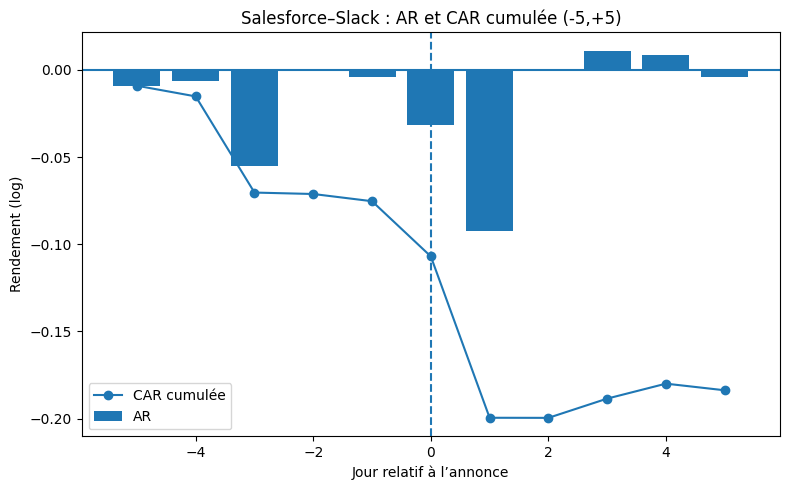

In [92]:
evt2 = evt.copy()
evt2["CAR_cum"] = evt2["AR"].cumsum()

plt.figure(figsize=(8, 5))
plt.bar(evt2.index, evt2["AR"].values, label="AR")
plt.plot(evt2.index, evt2["CAR_cum"].values, marker="o", label="CAR cumulée")
plt.axvline(0, linestyle="--")
plt.axhline(0)
plt.title("Salesforce–Slack : AR et CAR cumulée (-5,+5)")
plt.xlabel("Jour relatif à l’annonce")
plt.ylabel("Rendement (log)")
plt.legend()
plt.tight_layout()
plt.savefig("case_salesforce_slack_AR_CAR.png", dpi=300, bbox_inches="tight")
plt.show()

## Régression (OLS)


Estimation d'une régression linéaire (OLS) avec erreurs standards robustes à hétéroscédasticité (HC3), et affichage des résultats statistiques du modèle :

In [116]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from pathlib import Path
import pandas as pd

csv_path = Path.cwd() / "data" / "regression2.csv"
if not csv_path.exists():
    csv_path = Path.cwd().parent / "data" / "regression2.csv"

print("CSV utilisé :", csv_path)
df = pd.read_csv(csv_path, sep=";")


# 1) nettoyer noms de colonnes (espaces invisibles etc.)
df.columns = (
    df.columns.astype(str)
    .str.replace("\u00a0", "", regex=False)   # NBSP
    .str.replace("\u202f", "", regex=False)   # narrow NBSP
    .str.strip()
)

# si Cross_border a un espace final genre "Cross_border "
for c in list(df.columns):
    if c.startswith("Cross_border"):
        df = df.rename(columns={c: "Cross_border"})
    if c.startswith("Same_industry"):
        df = df.rename(columns={c: "Same_industry"})

# 2) conversion numérique robuste (gère "68 700 000 000,00" et "45%")
def to_num(s):
    s = s.astype(str)
    s = (s
         .str.replace("\u202f", "", regex=False)
         .str.replace("\u00a0", "", regex=False)
         .str.replace(" ", "", regex=False)
         .str.replace("%", "", regex=False)
         .str.replace(",", ".", regex=False)
    )
    return pd.to_numeric(s, errors="coerce")

for c in ["CAR", "DealSize", "Prime", "Same_industry", "Cross_border"]:
    df[c] = to_num(df[c])

# 3) Prime en décimal
df["Prime_dec"] = np.where(df["Prime"] > 1.5, df["Prime"] / 100.0, df["Prime"])

# 4) Equity dummy : 
df["payment_method"] = df["payment_method"].astype(str).str.strip().str.title()
df["Equity"] = np.where(df["payment_method"] == "Cash", 0, 1)

# 5) filtre prime
df = df[df["Prime_dec"] > -0.5].copy()

# 6) régression (IMPORTANT: dropna sur toutes les colonnes d'un coup)
cols_x = ["Equity", "DealSize", "Prime_dec", "Same_industry", "Cross_border"]
reg = df[["CAR"] + cols_x].dropna()

print("N final :", reg.shape[0])

# DEBUG si N=0 : montre le % de NaN par colonne
if reg.shape[0] == 0:
    print("\n% NaN par colonne :")
    print(df[["CAR"] + cols_x].isna().mean().sort_values(ascending=False))
    raise ValueError("N final = 0 : après conversion+filtre+dropna il ne reste aucune observation.")

y_reg = reg["CAR"]
X_reg = sm.add_constant(reg[cols_x])

model = sm.OLS(y_reg, X_reg).fit(cov_type="HC3")
print(model.summary())


CSV utilisé : /workspaces/IAE_METZ_2026_EMPIRICAL_FINANCE/data/regression2.csv
N final : 48
                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     4.241
Date:                Fri, 13 Feb 2026   Prob (F-statistic):            0.00328
Time:                        16:48:46   Log-Likelihood:                 68.719
No. Observations:                  48   AIC:                            -125.4
Df Residuals:                      42   BIC:                            -114.2
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

## Analyse des résultats :

Le modèle estimé est une régression linéaire par moindres carrés ordinaires (OLS) avec erreurs standards robustes à l’hétéroscédasticité (HC3), portant sur 48 observations.

Le modèle est globalement significatif avec :     


*   T-statistic = 4,241
*   Prob(F-statistic) = 0,00328

Au seuil de 1 %, on rejette l’hypothèse nulle selon laquelle l’ensemble des coefficients est conjointement nul. Les variables explicatives ont donc, collectivement, un pouvoir explicatif significatif sur le CAR.

Le pouvoir explicatif du modèle est modéré :


*   R-squared = 0.266
*   R-squared ajusted = 0,179

Ainsi, environ 26,6 % de la variance du CAR est expliquée par les variables incluses. Après correction du nombre de variables, la part expliquée tombe à 17,9 %, ce qui suggère un pouvoir explicatif réel mais limité, plutôt cohérent avec des cas d'analyse d'event study.

## Analyse des coefficients :  

### Equity :   


*   Coefficient = −0.0316
*   p-value = 0.259

Les opérations financées en equity seraient associées à un CAR inférieur d’environ 3,16 points de pourcentage par rapport aux paiements en cash.

Cependant, l’effet n’est pas statistiquement significatif aux seuils conventionnels (p > 0.10). On ne peut donc pas conclure à un effet différencié du mode de paiement.

### Deal Size :    


*  Coefficient = -0,0172
*  p-value = 0,565

La taille de la transaction présente un effet négatif, mais non significatif. Il n’y a pas d’évidence empirique d’un impact systématique de la taille du deal sur le CAR dans cet échantillon.

### Prime :    


*   Coefficient = -0,1545
*   p-value = 0,011


*   Intervalle de confiance à 95 % : [−0.274 ; −0.035]



Il s’agit de la seule variable statistiquement significative au seuil de 5 %.

Le coefficient négatif indique qu’une augmentation de la prime est associée à une diminution du CAR. Concrètement, une hausse d’un point de la prime entraîne une baisse moyenne du CAR de 15,45 points de pourcentage.

L’intervalle de confiance ne contient pas zéro, ce qui confirme la robustesse statistique de l’effet.

Ce résultat est cohérent avec l’idée que des primes élevées peuvent être perçues comme un signal de surpaiement par le marché.

### Same industry :     


*   Coefficient = 0,0264
*   p-value = 0,455


Le signe est positif : les acquisitions intra-sectorielles seraient associées à un CAR supérieur de 2,64 points de pourcentage.

Toutefois, l’effet n’est pas significatif, ce qui empêche toute conclusion statistique ferme.


### Cross border :     


*   Coefficient = 0,0144
*   p-value = 0,628

Les transactions transfrontalières présentent un effet positif estimé à 1,44 point de pourcentage, mais celui-ci est largement non significatif.


## Normalité des résidus :

*   Jarque-Bera p-value = 0.0654
*   Prob(Omnibus) = 0.055

Les tests de normalité sont légèrement au-dessus du seuil de 5 %. On ne rejette pas strictement la normalité, mais les résidus présentent une légère asymétrie (Skew = 0.467) et une kurtosis élevée (4.361), indiquant une distribution légèrement leptokurtique.

## Autocorrélation

*   Durbin-Watson = 1.732

La statistique est proche de 2, ce qui suggère l’absence d’autocorrélation significative des résidus.


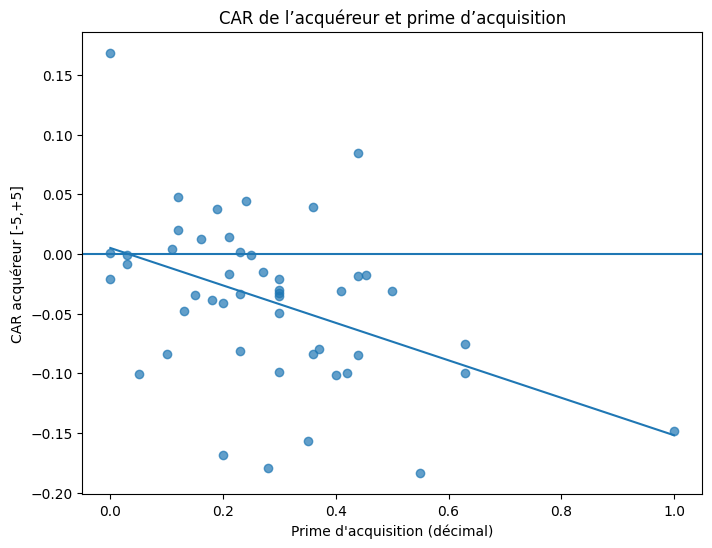

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrer les obs utilisées dans la régression
plot_df = df.dropna(subset=["CAR", "Prime_dec"])

x = plot_df["Prime_dec"]
y = plot_df["CAR"]

# Droite de régression simple
coef = np.polyfit(x, y, 1)
line_x = np.linspace(x.min(), x.max(), 100)
line_y = coef[0] * line_x + coef[1]

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.7)
plt.plot(line_x, line_y)
plt.axhline(0)
plt.xlabel("Prime d'acquisition (décimal)")
plt.ylabel("CAR acquéreur [-5,+5]")
plt.title("CAR de l’acquéreur et prime d’acquisition")
plt.show()

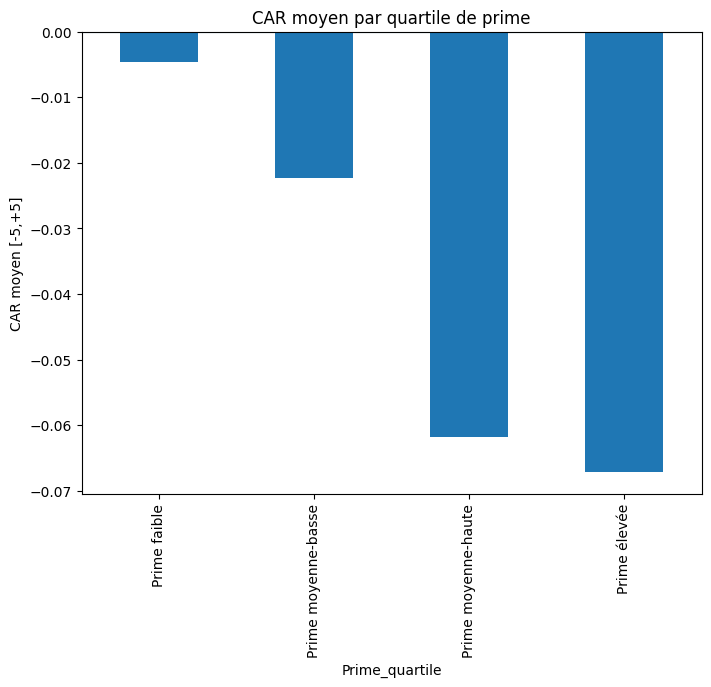

In [63]:
# Créer quartiles de prime
plot_df["Prime_quartile"] = pd.qcut(plot_df["Prime_dec"], 4, labels=[
    "Prime faible",
    "Prime moyenne-basse",
    "Prime moyenne-haute",
    "Prime élevée"
])

car_by_q = plot_df.groupby("Prime_quartile")["CAR"].mean()

plt.figure(figsize=(8,6))
car_by_q.plot(kind="bar")
plt.axhline(0)
plt.ylabel("CAR moyen [-5,+5]")
plt.title("CAR moyen par quartile de prime")
plt.show()

<Figure size 800x600 with 0 Axes>

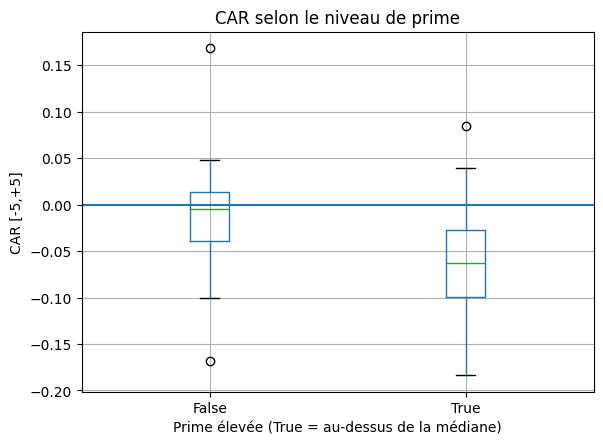

In [64]:
plot_df["High_Premium"] = (plot_df["Prime_dec"] > plot_df["Prime_dec"].median())

plt.figure(figsize=(8,6))
plot_df.boxplot(column="CAR", by="High_Premium")
plt.axhline(0)
plt.suptitle("")
plt.title("CAR selon le niveau de prime")
plt.xlabel("Prime élevée (True = au-dessus de la médiane)")
plt.ylabel("CAR [-5,+5]")
plt.show()